In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

import requests
import json

In [2]:
response = requests.get("https://opendata.fcgov.com/resource/3ku5-x4k9.json")
data = pd.read_json(json.dumps(response.json()))

In [3]:
data

,date_of_service,system_address,system_capacity_kw_dc,meta_row_index,meta_row_id,georeference_system_address,:@computed_region_j8ea_wntw
0,2016-12-23T00:00:00.000,309 URBAN PRAIRIE ST,5.6,698,aa86c9080afc54a27672845330ad1cd43d8b248c,NaN,NaN
1,2017-01-13T00:00:00.000,321 GREEN LEAF ST,9.3,713,213f8c5d110c325939ccbd789b2bb7999843e15e,NaN,NaN
2,2017-07-20T00:00:00.000,314 URBAN PRAIRIE ST,9.2,856,f846a1663e34071f254150b036422b31b90a8845,NaN,NaN
3,2017-12-21T00:00:00.000,703 HARTS GARDENS LN,6.5,960,97e791559a53897628881973dd5bbcd2704cb89a,NaN,NaN
4,2018-01-25T00:00:00.000,313 SATURN DR,3.4,998,b764c815495617ac39deabba7a3d7bf863f21f5e,NaN,NaN
...,...,...,...,...,...,...,...
995,2010-09-08T00:00:00.000,1012 SUNSET AVE,3.1,67,35ef52943650000ca4067064bb7b322e665b9b2f,"{'latitude': '40.580858', 'longitude': '-105.0...",59.0
996,2013-04-10T00:00:00.000,211 N SHERWOOD ST,6.4,199,479a07f52a010fa03ff143e043bafa3c1f6c78ef,"{'latitude': '40.589504', 'longitude': '-105.0...",146.0
997,2016-12-02T00:00:00.000,2824 TRENTON WAY,4.7,673,29333adb36063ba6c3857c80e9c08c7de7423f8b,"{'latitude': '40.548858', 'longitude': '-105.1...",501.0
998,2018-12-21T00:00:00.000,5815 BIG CANYON DR,14.4,1300,3672e7d3dc69bbb9c8d79492346270d0b3a68a10,"{'latitude': '40.505706', 'longitude': '-105.0...",123.0


In [4]:
x = data["date_of_service"]

In [5]:
y = data["system_capacity_kw_dc"]

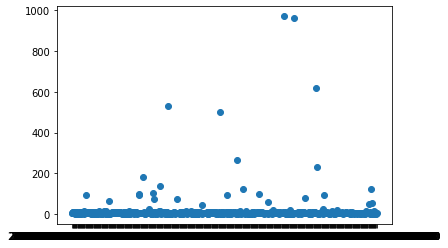

In [6]:
plt.scatter(x,y)

In [7]:
plt.show()

In [8]:
y.sum()
data["date_of_service"] = pd.to_datetime(data["date_of_service"])

In [9]:
print(data.index)

RangeIndex(start=0, stop=1000, step=1)


In [13]:
data["date_of_service"] = data["date_of_service"].apply(lambda data : datetime(year=data.year, month=data.month, day=data.day))
data.set_index(data["date_of_service"],inplace=True)
mask = (data["date_of_service"] > datetime(2005,1,1)) & (data["date_of_service"] <= datetime(2005,12,31))
data.loc[mask]

,date_of_service,system_address,system_capacity_kw_dc,meta_row_index,meta_row_id,georeference_system_address,:@computed_region_j8ea_wntw
date_of_service,,,,,,,
2005-06-16,2005-06-16,4225 TABLE MOUNTAIN PL,1.5,5,9f69f269af339a54cbfa6db93fafed1e183ca2c9,"{'latitude': '40.528609', 'longitude': '-105.0...",499.0
2005-08-31,2005-08-31,208 FISHBACK AVE,2.5,6,dba21e89be8b70437eb8cf56f97916ea0fd60128,"{'latitude': '40.589568', 'longitude': '-105.1...",138.0
2005-10-14,2005-10-14,1427 W MOUNTAIN AVE,3.0,7,c23c92f258ce7dacb844b583f85375316677a266,"{'latitude': '40.587075', 'longitude': '-105.1...",58.0


In [11]:
data

,date_of_service,system_address,system_capacity_kw_dc,meta_row_index,meta_row_id,georeference_system_address,:@computed_region_j8ea_wntw
date_of_service,,,,,,,
2016-12-23,2016-12-23,309 URBAN PRAIRIE ST,5.6,698,aa86c9080afc54a27672845330ad1cd43d8b248c,NaN,NaN
2017-01-13,2017-01-13,321 GREEN LEAF ST,9.3,713,213f8c5d110c325939ccbd789b2bb7999843e15e,NaN,NaN
2017-07-20,2017-07-20,314 URBAN PRAIRIE ST,9.2,856,f846a1663e34071f254150b036422b31b90a8845,NaN,NaN
2017-12-21,2017-12-21,703 HARTS GARDENS LN,6.5,960,97e791559a53897628881973dd5bbcd2704cb89a,NaN,NaN
2018-01-25,2018-01-25,313 SATURN DR,3.4,998,b764c815495617ac39deabba7a3d7bf863f21f5e,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-08,2010-09-08,1012 SUNSET AVE,3.1,67,35ef52943650000ca4067064bb7b322e665b9b2f,"{'latitude': '40.580858', 'longitude': '-105.0...",59.0
2013-04-10,2013-04-10,211 N SHERWOOD ST,6.4,199,479a07f52a010fa03ff143e043bafa3c1f6c78ef,"{'latitude': '40.589504', 'longitude': '-105.0...",146.0
2016-12-02,2016-12-02,2824 TRENTON WAY,4.7,673,29333adb36063ba6c3857c80e9c08c7de7423f8b,"{'latitude': '40.548858', 'longitude': '-105.1...",501.0


In [12]:
np.cumsum(data['system_capacity_kw_dc'].resample('Y').sum())

date_of_service
1999-12-31        1.0
2000-12-31        1.0
2001-12-31        1.0
2002-12-31        1.0
2003-12-31      501.0
2004-12-31      506.4
2005-12-31      513.4
2006-12-31      525.3
2007-12-31      528.0
2008-12-31      538.4
2009-12-31      794.9
2010-12-31     1146.5
2011-12-31     1348.7
2012-12-31     1561.3
2013-12-31     1780.1
2014-12-31     2398.9
2015-12-31     6973.8
2016-12-31     8030.3
2017-12-31     9305.9
2018-12-31    11161.3
2019-12-31    11507.4
Freq: A-DEC, Name: system_capacity_kw_dc, dtype: float64